In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV for image processing
import os  # For file handling
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [9]:
DATA_DIR  = "C:/Users/sunny/OneDrive/Desktop/DR_Project/"
categories = ["No_DR", "Mild", "Moderate", "Severe", "Proliferative"]

# Function to load images
def load_images(data_dir, categories):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (224, 224))  # Resize images
                data.append([img, label])
            except Exception as e:
                pass
    return np.array(data, dtype=object)

data = load_images(DATA_DIR, categories)


In [10]:
# Separate features and labels
data = load_images(DATA_DIR, categories)
images, labels = [], []
for feature, label in data:
    images.append(feature)
    labels.append(label)

# Convert to numpy arrays
X = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
y = to_categorical(labels, num_classes=len(categories))  # One-hot encode labels

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [13]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val)
)


Epoch 1/20
14/14 [==============================] - 17s 1s/step - loss: 1.7310 - accuracy: 0.2374 - val_loss: 1.6262 - val_accuracy: 0.1909
Epoch 2/20
14/14 [==============================] - 15s 1s/step - loss: 1.5834 - accuracy: 0.2671 - val_loss: 1.5656 - val_accuracy: 0.2909
Epoch 3/20
14/14 [==============================] - 15s 1s/step - loss: 1.5695 - accuracy: 0.2717 - val_loss: 1.5395 - val_accuracy: 0.3455
Epoch 4/20
14/14 [==============================] - 15s 1s/step - loss: 1.5683 - accuracy: 0.2648 - val_loss: 1.5287 - val_accuracy: 0.3455
Epoch 5/20
14/14 [==============================] - 16s 1s/step - loss: 1.5553 - accuracy: 0.2671 - val_loss: 1.5146 - val_accuracy: 0.3455
Epoch 6/20
14/14 [==============================] - 16s 1s/step - loss: 1.5350 - accuracy: 0.3174 - val_loss: 1.4723 - val_accuracy: 0.3545
Epoch 7/20
14/14 [==============================] - 15s 1s/step - loss: 1.4919 - accuracy: 0.3219 - val_loss: 1.3838 - val_accuracy: 0.3727
Epoch 8/20
14/14 [==

4/4 [==============================] - 1s 140ms/step - loss: 1.3415 - accuracy: 0.3455
Validation Accuracy: 34.55%


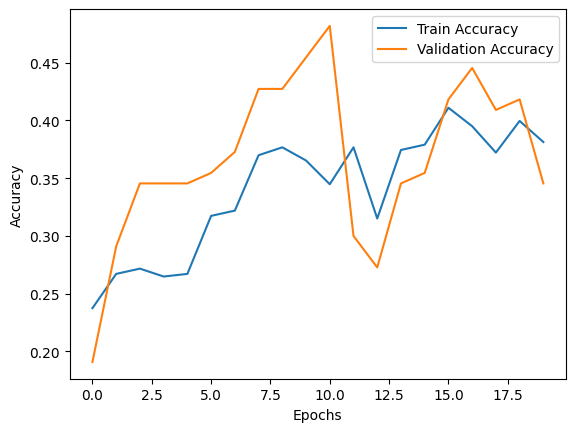

In [14]:
# Evaluate
loss, acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {acc*100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
model.save("diabetic_retinopathy_model.h5")
model.save('model.h5', save_format='h5')

